In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from math import sqrt

In [3]:
df = pd.read_csv('./Election.txt', sep='\t')
y = df['voterturnout_pct_diff']
x1 = df['median_hh_inc']
df.columns

Index(['state', 'county', 'trump16_pct', 'clinton16_pct', 'otherpres16_pct',
       'romney12_pct', 'obama12_pct', 'otherpres12_pct', 'senaterace16',
       'houserace16', 'govrace16', 'total_population', 'cvap',
       'voterturnout16_pct', 'voterturnout12_pct', 'voterturnout_pct_diff',
       'white_pct', 'nonwhite_pct', 'black_pct', 'hispanic_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'rural_pct'],
      dtype='object')

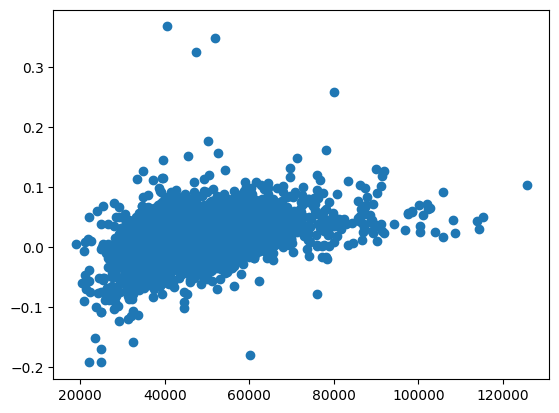

In [5]:
# Step 1

plt.scatter(x1, y)

The graph shows a slight downward curve. We can see outliers on the very top on the very bottom that have an import residuals. THey will have a medium influence on the model. One point will we more challenging. It seems to have a high influence on the model because of its high leverage and position.

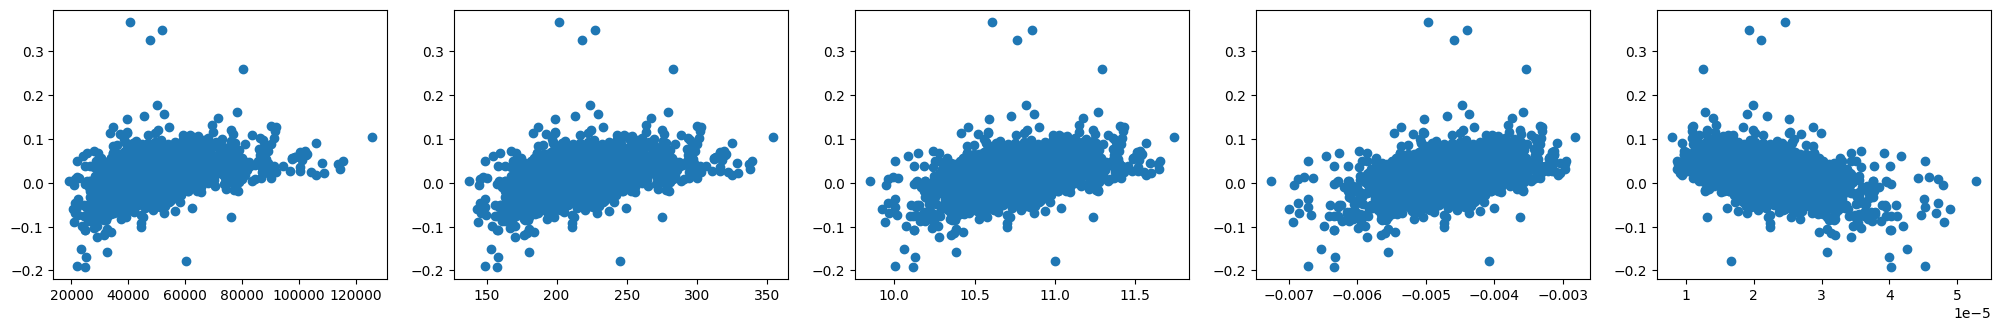

In [25]:
def helper(ax, x, y):
    out = ax.scatter(x, y)
    return out

x = [x1, np.sqrt(x1), np.log(x1), -1/np.sqrt(x1), 1/x1]

x1_r = np.sqrt(x1)
x1_r2 = np.log10(x1)

fig, axes= plt.subplots(1, len(x), figsize=(25, 3.5))

for ax, a in zip(axes, x):
    helper(ax, a, y)

plt.show()

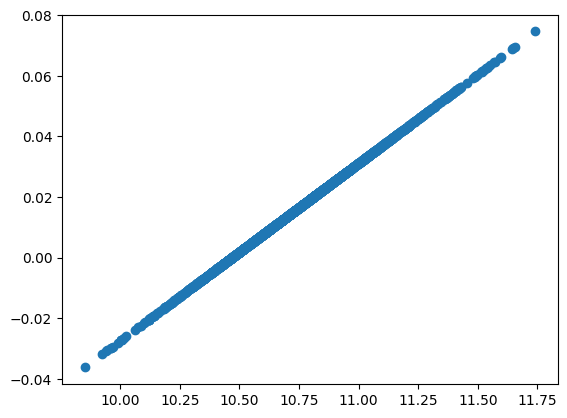

In [33]:
x_r = x[2]

b1 = x_r.corr(y)*y.std()/x_r.std()
b0 = y.mean() - b1*x_r.mean()

def model(x):
    return b0 + b1*x

def reverse(y):
    return 10**y

predictions = b0 + b1*x_r
residuals = y - predictions

plt.scatter(x_r, predictions)

In [36]:
reverse(model(np.log10(20000))), reverse(model(np.log10(55000))), reverse(model(np.log10(120000)))

(0.434869157994999, 0.46144487125070316, 0.4830445393796077)

In [59]:
# Step 5
df = pd.read_csv('./Election.txt', sep='\t')

def return_dic(title, b0, b1, r_sq, se):
    dic = {'Title': title,
           'b0': b0,
           'b1': b1,
           'r_sq': r_sq,
           'se': se,
          }
    return dic
       
variables = []

def fit_model(title, df):
    y = df['voterturnout_pct_diff']
    x1 = df['median_hh_inc']
    x_r = np.log10(x1)
    b1 = x_r.corr(y)*y.std()/x_r.std()
    b0 = y.mean() - b1*x_r.mean()
    predictions = b0 + b1*x_r
    residuals = y - predictions
    se = sqrt(residuals.sum()**2)/(len(residuals)-2)
    variables.append(return_dic(title, b0, b1, x_r.corr(y), se))

    
df1 = df[df.voterturnout_pct_diff < 0.2]
df2 = df[df.median_hh_inc > 12000]

titles = ['original', 'no top', 'no right']

for title, data in zip(titles, d):
    fit_model(title, data)

In [62]:
for column_name in variables[0].keys():
    print(column_name, end=" "*(15-len(voli)
    
print('')

for data in variables:
    for datum in data.values():
        if isinstance(datum, str):
            print(datum, end=" "*(7-len(datum)))
        else:
            datum = float(datum)
            print(f'{datum:.2f}', end=" "*5)
    print()

Title       b0       b1       r_sq       se       
original-0.61     0.14     0.39     0.00     
no top -0.61     0.13     0.41     0.00     
no right-0.61     0.14     0.39     0.00     


In [44]:
variables[1].keys()

dict_keys(['Title', 'b0', 'b1', 'r_sq', 'se'])